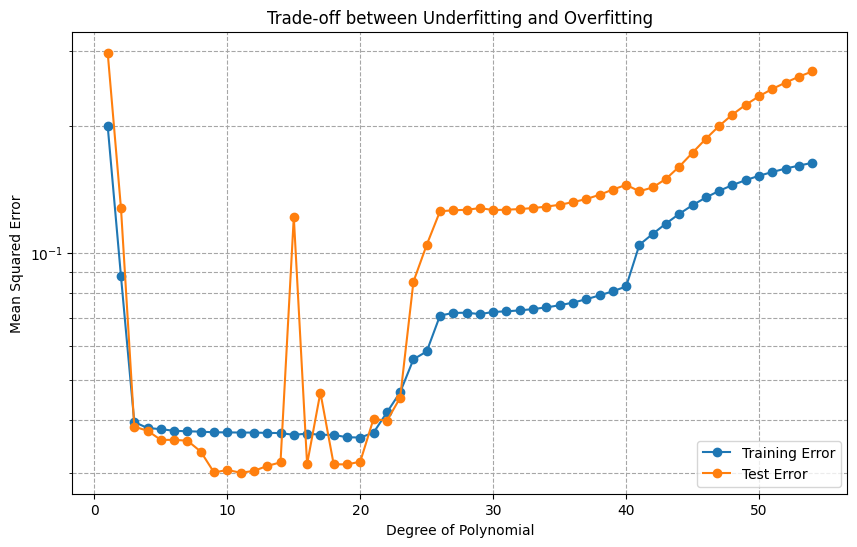

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel()
y += np.random.randn(n_samples) * 0.2  # add noise

# 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = list(range(1, 55))
train_errors, test_errors = [], []

for degree in degrees:
    model = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# 4. Plot training and test errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, test_errors, label="Test Error", marker='o')
plt.yscale("log")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Trade-off between Underfitting and Overfitting")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()


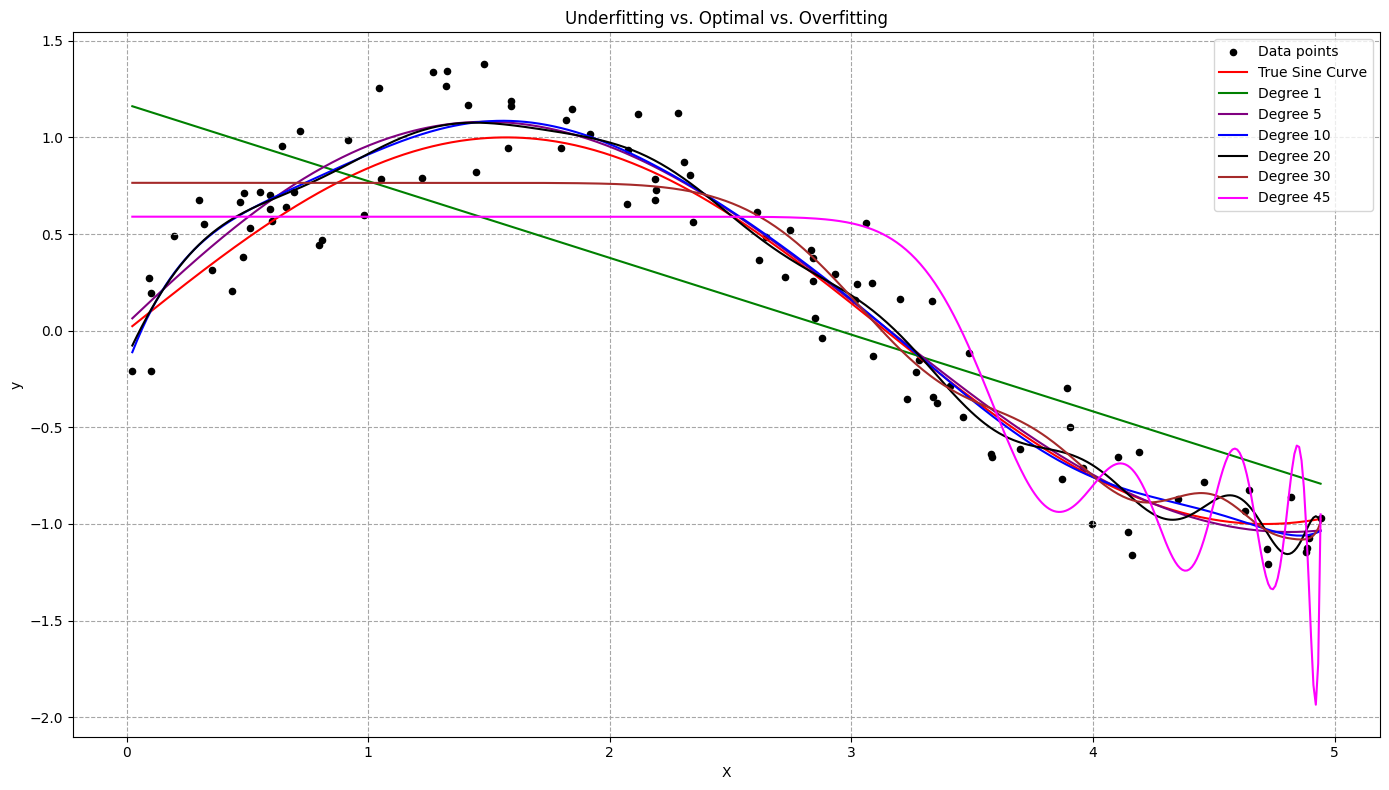

In [ ]:
# ... (Continue from previous code: Data generation and importing libraries)

# Function to plot the model's prediction
def plot_prediction(model, label, color="blue"):
    x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=label, color=color)

plt.figure(figsize=(14, 8))

# 1. Plot the original data points
plt.scatter(X, y, color='black', s=20, marker='o', label="Data points")

# 2. Plot the true sine curve
x_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
plt.plot(x_range, np.sin(x_range), color="red", label="True Sine Curve")

# 3. Plot prediction curves
for degree, color in zip([1,5, 10, 20,30,45], ["green","purple" ,"blue","black" ,"brown", "magenta"]):
    model = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])
    model.fit(X_train, y_train)
    plot_prediction(model, label=f"Degree {degree}", color=color)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Underfitting vs. Optimal vs. Overfitting")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()


In this code:

We perform 10-fold cross-validation for different polynomial degrees.
We plot the mean MSE (Mean Squared Error) and its standard deviation for each degree. This helps us visualize the performance and the variability of each model.
The summary report categorizes each degree as underfitting, optimal, or overfitting based on the cross-validation MSE.
The plot and the summary report should give you a clear picture of which model is the optimal one, which models are overfitting, and which ones are underfitting.

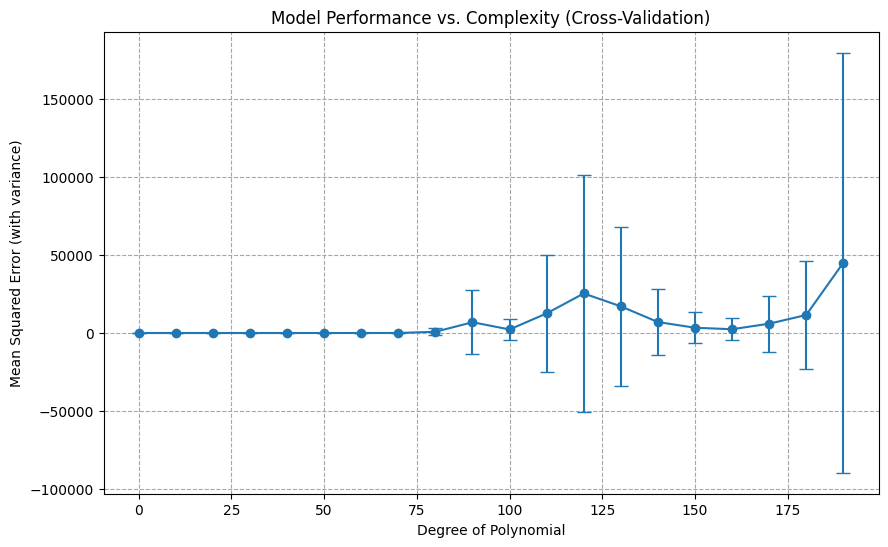

Optimal Model: Degree 10

Degree 0: Underfitting (MSE: 0.54)
Degree 10: Optimal (MSE: 0.05)
Degree 20: Overfitting (MSE: 0.13)
Degree 30: Overfitting (MSE: 0.24)
Degree 40: Overfitting (MSE: 0.20)
Degree 50: Overfitting (MSE: 3.42)
Degree 60: Overfitting (MSE: 0.89)
Degree 70: Overfitting (MSE: 23.57)
Degree 80: Overfitting (MSE: 779.01)
Degree 90: Overfitting (MSE: 6910.72)
Degree 100: Overfitting (MSE: 2269.84)
Degree 110: Overfitting (MSE: 12585.96)
Degree 120: Overfitting (MSE: 25378.31)
Degree 130: Overfitting (MSE: 17110.06)
Degree 140: Overfitting (MSE: 7032.02)
Degree 150: Overfitting (MSE: 3379.88)
Degree 160: Overfitting (MSE: 2415.24)
Degree 170: Overfitting (MSE: 5970.69)
Degree 180: Overfitting (MSE: 11550.77)
Degree 190: Overfitting (MSE: 45112.64)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# ... (Same data generation code as before) ...

degrees = list(range(0, 200,10))
mean_scores = []
std_scores = []

# Use negative mean squared error as the scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

for degree in degrees:
    model = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])

    scores = cross_val_score(model, X_train, y_train, cv=10, scoring=scorer)

    mean_scores.append(-np.mean(scores))  # negate because higher score is better
    std_scores.append(np.std(scores))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(degrees, mean_scores, yerr=std_scores, marker='o', capsize=5)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error (with variance)")
plt.title("Model Performance vs. Complexity (Cross-Validation)")
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()

# Generating Summary Report
optimal_degree = degrees[np.argmin(mean_scores)]
summary = f"Optimal Model: Degree {optimal_degree}\n\n"

for degree, mean_score in zip(degrees, mean_scores):
    if degree < optimal_degree:
        summary += f"Degree {degree}: Underfitting (MSE: {mean_score:.2f})\n"
    elif degree == optimal_degree:
        summary += f"Degree {degree}: Optimal (MSE: {mean_score:.2f})\n"
    else:
        summary += f"Degree {degree}: Overfitting (MSE: {mean_score:.2f})\n"

print(summary)


Certainly! Here's a summary of the code provided:

---

**Purpose**:
The code aims to demonstrate the concept of model regularization using Ridge Regression on the `diabetes` dataset from `scikit-learn`. It helps visualize the impact of regularization strength (`alpha` in Ridge Regression) on model performance and coefficients.

**Steps**:
1. **Loading and Preprocessing**:
    - The `diabetes` dataset is loaded.
    - The features (`X`) are normalized using `StandardScaler` to have zero mean and unit variance.
    - The dataset is split into training and testing sets.

2. **Model Training**:
    - A range of `alpha` values (regularization strength) is defined for Ridge Regression.
    - Using `validation_curve`, both training and validation scores for each `alpha` value are computed with 5-fold cross-validation. The negative mean squared error is used as a scoring metric.

3. **Visualization**:
    - A plot is generated to visualize the mean training and validation errors (MSE) across the different `alpha` values. Shaded regions represent the variance (standard deviation) in these errors.
    - A second plot visualizes how model coefficients change with different `alpha` values. Each line represents the coefficients of the model for a particular `alpha`.

4. **Evaluation**:
    - The optimal `alpha` value (that minimizes validation error) is identified.
    - A Ridge model with the optimal `alpha` is trained on the entire training set and evaluated on the testing set to compute the test MSE.

5. **Summary Report**:
    - The optimal `alpha` value and the corresponding test MSE are printed.

**Key Takeaways**:
- As the regularization strength (`alpha`) increases, model coefficients tend to shrink towards zero. This is evident from the coefficients plot.
- There's a trade-off in model complexity. Too little regularization (small `alpha`) might lead to overfitting (model performs well on training data but poorly on unseen data), while too much regularization (large `alpha`) can lead to underfitting (model is too simplistic and doesn't capture underlying patterns). The validation error plot can help identify this sweet spot.

---

This code showcases the importance of regularization in machine learning models and provides a visual and quantitative method to choose the optimal regularization strength.

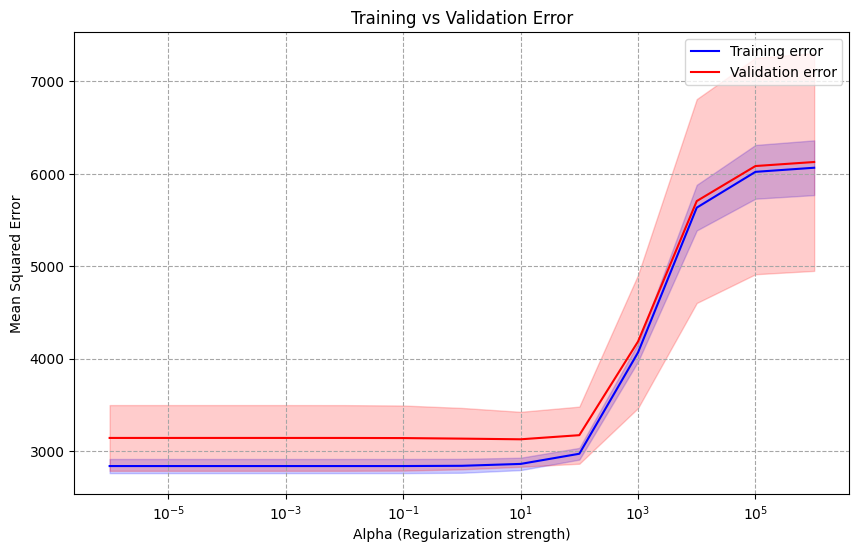

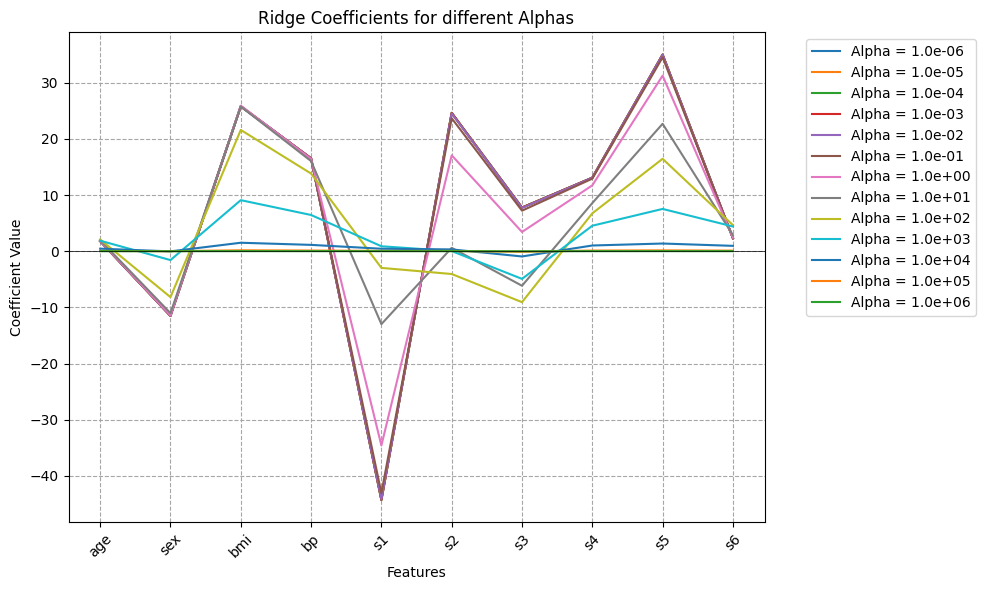

Optimal Alpha: 1.0e+01
Test MSE with Optimal Alpha: 2875.67


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load diabetes data
data = load_diabetes()
X, y = data.data, data.target

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Ridge Regression: Tune alpha parameter
alpha_values = np.logspace(-6, 6, 13)
# Correcting the validation_curve call
train_scores, valid_scores = validation_curve(Ridge(), X_train, y_train,
                                              param_name="alpha", param_range=alpha_values,
                                              scoring="neg_mean_squared_error", cv=5)

# Calculate mean and std for scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plotting Training and Validation errors
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, train_mean, label="Training error", color="blue")
plt.semilogx(alpha_values, valid_mean, label="Validation error", color="red")
plt.fill_between(alpha_values, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(alpha_values, valid_mean - valid_std, valid_mean + valid_std, color="red", alpha=0.2)
plt.xlabel("Alpha (Regularization strength)")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Validation Error")
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()

# Finding Optimal Model and Testing
optimal_alpha = alpha_values[np.argmin(valid_mean)]
ridge = Ridge(alpha=optimal_alpha)
ridge.fit(X_train, y_train)
test_mse = mean_squared_error(y_test, ridge.predict(X_test))

# Plotting Coefficients
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    plt.plot(range(X_train.shape[1]), model.coef_, label=f"Alpha = {alpha:.1e}")
plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(range(X_train.shape[1]), data.feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.title("Ridge Coefficients for different Alphas")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

# Summary Report
print(f"Optimal Alpha: {optimal_alpha:.1e}")
print(f"Test MSE with Optimal Alpha: {test_mse:.2f}")
